In [24]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn.datasets  
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.datasets import load_iris
%matplotlib inline

In [25]:
# load data
iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])

In [26]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


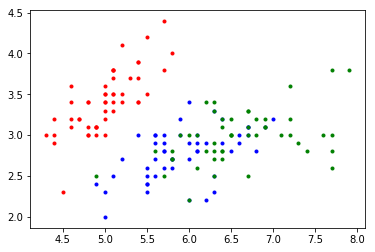

In [84]:
plt.scatter(data=iris[iris['target'] == 0], x='sepal length (cm)', y='sepal width (cm)', marker='.', color='r')
plt.scatter(data=iris[iris['target'] == 1], x='sepal length (cm)', y='sepal width (cm)', marker='.', color='b')
plt.scatter(data=iris[iris['target'] == 2], x='sepal length (cm)', y='sepal width (cm)', marker='.', color='g')

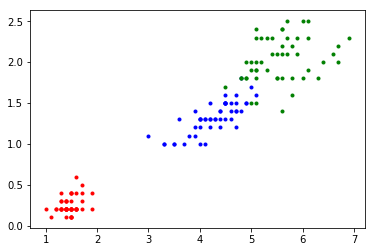

In [85]:
plt.scatter(data=iris[iris['target'] == 0], x='petal length (cm)', y='petal width (cm)', marker='.', color='r')
plt.scatter(data=iris[iris['target'] == 1], x='petal length (cm)', y='petal width (cm)', marker='.', color='b')
plt.scatter(data=iris[iris['target'] == 2], x='petal length (cm)', y='petal width (cm)', marker='.', color='g')

In [33]:
# Least squares
regr = linear_model.LinearRegression()
Y = iris['target'].values.reshape(-1,1)
X = iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[-0.10974146 -0.04424045  0.22700138  0.60989412]]

Intercept: 
 [0.19208399]

R-squared:
0.9304223675331597


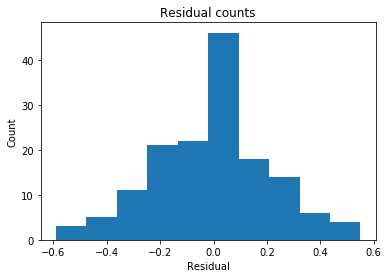

In [35]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = iris['target']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

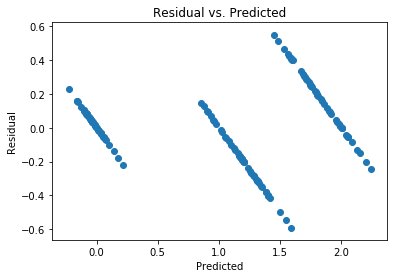

In [36]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual vs. Predicted')
plt.show()

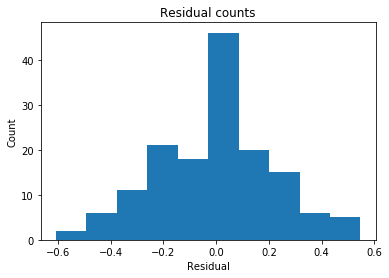

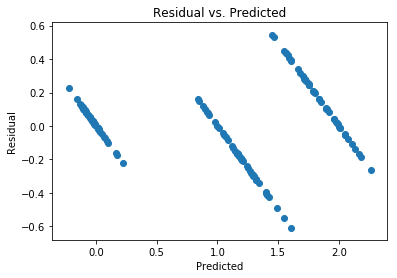

In [87]:
# Let's run again, but this time we will drop sepal width from X
X_2 = iris[['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']]
regr.fit(X_2, Y)

predicted = regr.predict(X_2).ravel()
actual = iris['target']

residual = actual - predicted
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual vs. Predicted')
plt.show()

The data looks normally destributed in both sets and we have homoscedastity. It does not appear that the sepal width adds much value to the model.

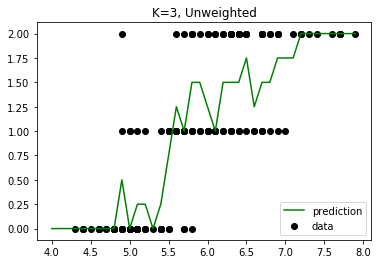

In [66]:
knn = neighbors.KNeighborsRegressor(n_neighbors=4,)
X_k_sl = pd.DataFrame(iris['sepal length (cm)'])
knn.fit(X_k_sl, Y)

# Set up our prediction line.
T = np.arange(4, 8, 0.1)[:, np.newaxis]


# Trailing underscores are a common convention for a prediction.
Y_k = knn.predict(T)

plt.scatter(X_k_sl, Y, c='k', label='data')
plt.plot(T, Y_k, c='g', label='prediction')
plt.legend()
plt.title('K=3, Unweighted')
plt.show()

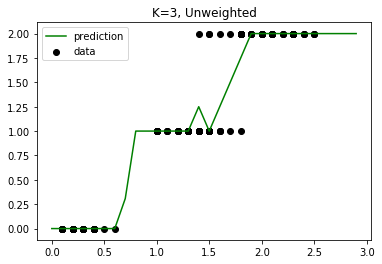

In [72]:
knn = neighbors.KNeighborsRegressor(n_neighbors=4, weights='distance')
X_k_pw = pd.DataFrame(iris['petal width (cm)'])
knn.fit(X_k_pw, Y)

# Set up our prediction line.
T = np.arange(0, 3, 0.1)[:, np.newaxis]


# Trailing underscores are a common convention for a prediction.
Y_k = knn.predict(T)

plt.scatter(X_k_pw, Y, c='k', label='data')
plt.plot(T, Y_k, c='g', label='prediction')
plt.legend()
plt.title('K=3, Unweighted')
plt.show()

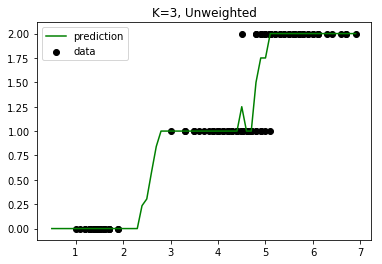

In [79]:
knn = neighbors.KNeighborsRegressor(n_neighbors=4, weights='distance')
X_k_pl = pd.DataFrame(iris['petal length (cm)'])
knn.fit(X_k_pl, Y)

# Set up our prediction line.
T = np.arange(0.5, 7, 0.1)[:, np.newaxis]


# Trailing underscores are a common convention for a prediction.
Y_k = knn.predict(T)

plt.scatter(X_k_pl, Y, c='k', label='data')
plt.plot(T, Y_k, c='g', label='prediction')
plt.legend()
plt.title('K=3, Unweighted')
plt.show()

It appears as if using the petal width and length will give accurate estimates

It appears that for this data set that a linear regression works best though both of the work well and trip up over the same area where target 1 and target two become close to each other. Since the data is well clustered this makes sense. Any regression should work well when the groups are well enough defined. 

